### **numpy**, **SciPy stats** and **matplotlib** modules  
The **numpy** and **SciPy stats** and **matplotlib** modules have many mathematical  
and statistical methods used in **Data Science** and **Machine Learning**  

Given a collection of numeric values, such as a list, we can compute:

- **mean** - the average value (numpy)
- **median** - the mid-point value (numpy)
- **mode** - the most frequent value (stats)
- **standard deviation** - how far a value is from the mean (numpy)
- **variance** - standard deviation squared (numpy)

We can also generate numpy arrays of *random* numeric values.
- **random.uniform** generates random, *uniform* (even) distribution of values
- **random.normal** generates random, *normal* (bell curve shaped) distribution of values

**matplotlib is for plotting data**
- **histogram** shows **frequency distribution** of values: **plt.hist()**   
random **uniform** and **normal** distributions can be plotted as a histogram. (matplotlib)
- **scatter plot** shows  individual points in **(x,y) space**, as dots:  **plt.scatter()**
- **line plot** shows lines in **(x,y) space**: **plt.plot()**
- **linear regression** shows **best-fit / trend** lines.  
given **x** or **y**, we can *predict* the other value by plotting it on the regression line.

In [349]:
# 1. connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [350]:
# install libraries if needed:
%pip install scipy

In [376]:
# 2. import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import Image
import pprint as pp
import scipy.stats as stats

In [352]:
# 3. set the base URL (the path that is the same for
# all items loaded from Google Drive)
base_url = "/content/drive/MyDrive/____Intro-Python-Machine-Learning-Dec-2025/"

In [353]:
# load the car sales csv file into df:
cars_df = pd.read_csv(base_url + 'csv/Car_sales.csv')

In [354]:
print(cars_df.shape) # (157, 16)
print("first value in tuple (number of rows):", cars_df.shape[0])
print("last value in tuple (number of cols):", cars_df.shape[-1])
# get the datatypes of the df's shape and of the df itself
print("shape datatype:", type(cars_df.shape))
print("dataframe datatype:", type(cars_df))
cars_df.head() # rows 1-5
# outputting the df:
# df -- the whole thing (will only show around 50 rows ... )
# df.head() -- first 5 rows
# df.head(8) -- first 8 rows
# df.tail() -- last 5 rows
# df.tail(3) -- last 3 rows
# df.sample(10) -- 10 random rows

(157, 16)
first value in tuple (number of rows): 157
last value in tuple (number of cols): 16
shape datatype: <class 'tuple'>
dataframe datatype: <class 'pandas.core.frame.DataFrame'>


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### **.loc vs .iloc** for 2D matrix selections
- **df.loc[start_row_name:end_row_name_incl,start_col_name:end_col_name_incl]**
- **df.iloc[start_row_index:end_row_index_excl,start_col_index:end_col_index_excl]**

In [355]:
# loc vs iloc: loc takes col names and index names
# with loc end name is NOT exclusive -- it is INCLUSIVE
# using loc, get the first 3 rows first 3 cols (3x3 in the upper left corner)
# cars_df.loc[start_row_name:end_row_name_incl,start_col_name:end_col_name_incl]
cars_df.loc[0:2, "Manufacturer":"Sales_in_thousands"]

,Manufacturer,Model,Sales_in_thousands
0,Acura,Integra,16.919
1,Acura,TL,39.384
2,Acura,CL,14.114


In [356]:
# challenge A: same as above, but with iloc instead of loc
cars_df.iloc[:3,:3]

,Manufacturer,Model,Sales_in_thousands
0,Acura,Integra,16.919
1,Acura,TL,39.384
2,Acura,CL,14.114


In [357]:
# challenge B: same as above, with both .loc and .iloc versions
# BUT get the lower RIGHT 3x3
# first the .loc version:
end_index = len(cars_df) - 1 # 156 = 157 - 1
cars_df.loc[end_index-2:end_index, "Fuel_efficiency":"Power_perf_factor"]

,Fuel_efficiency,Latest_Launch,Power_perf_factor
154,25.0,6/25/2011,71.155978
155,23.0,4/26/2011,101.623357
156,24.0,11/14/2011,85.735655


In [358]:
# challenge C: same as above, with both .loc and .iloc versions
# BUT get the lower RIGHT 3x3
# then the .iloc version:
cars_df.iloc[-3:,-3:]

,Fuel_efficiency,Latest_Launch,Power_perf_factor
154,25.0,6/25/2011,71.155978
155,23.0,4/26/2011,101.623357
156,24.0,11/14/2011,85.735655


In [359]:
# make a list of just the column names
car_df_cols_list = cars_df.columns.tolist()
# print('car_df_cols_list:\n',car_df_cols_list)
# get the length (num rows)
pp.pprint(car_df_cols_list)
# print('num_rows:')

['Manufacturer',
 'Model',
 'Sales_in_thousands',
 '__year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Latest_Launch',
 'Power_perf_factor']


#### **unique_items_list = df["col_name"].unique().tolist()** returns list of unique values in a col
#### **value_counts_series = df["col_name"].value_counts()** returns series of unique values and their counts as key-value pairs

In [360]:
# get the unique vehicle types
vehicle_types = cars_df["Vehicle_type"].unique().tolist()
pp.pprint(vehicle_types)
print()
# get the unique Manufacturer:
manufacturers_list = cars_df["Manufacturer"].unique().tolist()
print("number of manufacturers:", len(manufacturers_list))
pp.pprint(manufacturers_list)

# get the value counts for manufacturers (how many car rows for each):
value_counts_series = cars_df["Manufacturer"].value_counts()
print("value_counts_series datatype:", type(value_counts_series))
value_counts_dict = dict(value_counts_series)
print("value_counts_dict from series\n:", value_counts_dict)
value_counts_list = value_counts_series.tolist()
print("value_counts_list from series\n:", value_counts_list)
value_counts_series

['Passenger', 'Car']

number of manufacturers: 30
['Acura',
 'Audi',
 'BMW',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Jaguar',
 'Jeep',
 'Lexus',
 'Lincoln',
 'Mitsubishi',
 'Mercury',
 'Mercedes-B',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Saab',
 'Saturn',
 'Subaru',
 'Toyota',
 'Volkswagen',
 'Volvo']
value_counts_series datatype: <class 'pandas.core.series.Series'>
value_counts_dict from series
: {'Ford': np.int64(11), 'Dodge': np.int64(11), 'Chevrolet': np.int64(9), 'Mercedes-B': np.int64(9), 'Toyota': np.int64(9), 'Chrysler': np.int64(7), 'Mitsubishi': np.int64(7), 'Nissan': np.int64(7), 'Mercury': np.int64(6), 'Oldsmobile': np.int64(6), 'Lexus': np.int64(6), 'Pontiac': np.int64(6), 'Volvo': np.int64(6), 'Volkswagen': np.int64(6), 'Cadillac': np.int64(5), 'Honda': np.int64(5), 'Saturn': np.int64(5), 'Plymouth': np.int64(4), 'Buick': np.int64(4), 'Acura': np.int64(4), 'Audi': np.int64(3), 'BMW

,count
Manufacturer,
Ford,11
Dodge,11
Chevrolet,9
Mercedes-B,9
Toyota,9
Chrysler,7
Mitsubishi,7
Nissan,7
Mercury,6


In [361]:
# get info about df.. any missing data?
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

### **some important df methods:**
- **drop** removes col(s) from df
```python
df.drop(columns=["col_1", "col_2"], inplace=True)
```
- **pop** removes col and returns it as a series of key-value pairs:
```python
popped_col_1 = df.pop("col_1")
```
- **insert** adds col to df; takes 3 args: index, col_name, col_data:
```python
df.insert(5, "col_1", popped_col_1)
```
- **rename** renames col(s); uses key-value pairs for old-new names:
```python
df.rename(columns={"col_1":"col_A", "col_2":"col_B"}, inplace=True)
```


In [362]:
# a bit more dataframe practice:
# drop, move and rename cols

# a.) drop "__year_resale_value" (missing a lot of data)
cars_df.drop(columns="__year_resale_value",inplace=True)

In [363]:
print(cars_df.shape) # (157, 15)
cars_df.head()

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [364]:
print(car_df_cols_list)
# b.) move 'Wheelbase' to be between 'Length and 'Curb_weight'
# get the index of 'Curb_weight' col so that we know where to insert 'Wheelbase'; list.index(item) returns the numeric position (index) of the item in the list
wheelbase_col_popped = cars_df.pop('Wheelbase')

['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']


In [365]:
print(wheelbase_col_popped.tolist()[:5])

[101.2, 108.1, 106.9, 114.6, 102.6]


In [366]:
# get fresh columns list, since we have removed the 'Wheelbase' column:
car_df_cols_list_no_wheelbase = cars_df.columns.tolist()
print(car_df_cols_list_no_wheelbase)
index_of_curb_wt_col = car_df_cols_list_no_wheelbase.index('Curb_weight')
print('index_of_curb_wt_col:',index_of_curb_wt_col)

['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor']
index_of_curb_wt_col: 9


In [367]:
# insert the popped wheelbase series as col data at new index (9):
# df.insert(index,col_name,data)
cars_df.insert(index_of_curb_wt_col,"Wheelbase",wheelbase_col_popped)

In [368]:
print(cars_df.shape)
cars_df.head()

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,67.3,172.4,101.2,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,70.3,192.9,108.1,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,70.6,192.0,106.9,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,71.4,196.6,114.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,68.2,178.0,102.6,2.998,16.4,27.0,10/8/2011,62.777639


In [369]:
# c.) rename 'Power_perf_factor' as 'Power_Performance'
# 'Power_perf_factor'
cars_df.rename(columns={'Power_perf_factor':'Power_Performance'}, inplace=True)

In [370]:
print(cars_df.shape)
cars_df.head()

(157, 15)


,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_Performance
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,67.3,172.4,101.2,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,70.3,192.9,108.1,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,70.6,192.0,106.9,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,71.4,196.6,114.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,68.2,178.0,102.6,2.998,16.4,27.0,10/8/2011,62.777639


In [371]:
# 4. declare a list of numbers and find their min and max:
degrees_fahr = [ 77,66,72,88,90,56,91,82,90,101,75,63,70,83, 95, 95, 74, 48, 92]
print(len(degrees_fahr)) # 19

min_deg = min(degrees_fahr)
print('minimum degrees:', min_deg) # 48

max_deg = max(degrees_fahr)
print('maximum degrees:', max_deg) # 101

# np.argmin(list) returns the index of the min value in a list
min_dex = np.argmin(degrees_fahr)
print('index of minimum degrees:', min_dex) # 17

max_dex = np.argmax(degrees_fahr)
# np.argmax(list) returns the index of the max value in a list
print('index of maximum degrees:', max_dex) # 9

19
minimum degrees: 48
maximum degrees: 101
index of minimum degrees: 17
index of maximum degrees: 9


In [372]:
# 4B. get the min / max / mean of the df's Horsepower col:
min_hp = cars_df["Horsepower"].min()
print(min_hp) # 55.0

max_hp = cars_df["Horsepower"].max()
print(max_hp) # 450.0

mean_hp = round(cars_df["Horsepower"].mean())
print(mean_hp) # 186

med_hp = round(cars_df["Horsepower"].median())
print(med_hp) # 178

mode_manuf = round(cars_df["Manufacturer"].mode())
print(type(mode_manuf))
print(mode_manuf) # 178

count_manuf = round(cars_df["Manufacturer"].count())
print(type(count_manuf))
print(count_manuf) # 178

55.0
450.0
186
178
<class 'pandas.core.series.Series'>
0    Dodge
1     Ford
Name: Manufacturer, dtype: object
<class 'int'>
157


In [373]:
# 5. find the mean (average) and median value of the degrees list:
avg_temp = round(np.mean(degrees_fahr),1)
print('avg_temp:', avg_temp) # 79.4

med_deg = round(np.median(degrees_fahr),1)
print('med_deg:',med_deg) # 82.0

# 6. median is middle value, which you get if you sort the list
# deg_fahr.sort()
# median is the value in the middle of sorted nums
# if you do NOT want to change original list
# no NOT use list.sort(), instead use:
# new_list = sorted(list)
# which returns a new list while leaving orig
# list UNCHANGED

avg_temp: 79.4
med_deg: 82.0


In [374]:
# add 2 more 90's so that we have a clear winner for 'mode'
degrees_fahr.extend([90,90])
print('degrees_fahr:\n',degrees_fahr)

degrees_fahr:
 [77, 66, 72, 88, 90, 56, 91, 82, 90, 101, 75, 63, 70, 83, 95, 95, 74, 48, 92, 90, 90]


The **mode** method returns a **tuple**, which is immutable collection of numeric values in parentheses **()**.  
The **ModeResult** tuple contains two values:   
- the **mode** value itself, and
- the **count** (number of occurrences) of the mode.

The tuple items can be accessed by index: 0 and 1:

In [380]:
# 7. find the mode (most frequently occurring) deg:
# if there's a tie, it takes the first one (from sorted list)
# add 2 90's to the list
deg_fahr_mode_tuple = tuple(stats.mode(degrees_fahr))
print('deg_fahr_mode_tuple:',deg_fahr_mode_tuple)
# print('mode_degrees_fahr:') # ModeResult(mode=90, count=5)
# # get the mode value and frequency from the tuple:

mode_value = deg_fahr_mode_tuple[0]
print('mode_value:', mode_value) # 90

mode_freq = deg_fahr_mode_tuple[1]
print('mode_freq:',mode_freq) # 4

deg_fahr_mode_tuple: (np.int64(90), np.int64(4))
mode_value: 90
mode_freq: 4


**standard deviation** is a measure of how far a value is from the mean.
- In **normal distribution** most values cluster around the mean.
- This can be shown by a symmetrically graph called a **bell curve**
- On a bell curve of normal distribution:
  - 68.2% of all values are within 1 standard deviation, plus or minus, of the mean.
  - 95.4% of all values are within 2 standard deviations, plus or minus, of the mean.
  - 99.8% of all values are within 3 standard deviations, plus or minus, of the mean.

The standard deviation of the **horsepower** column would be that value which,  
if added or subtracted from the mean, would give a value that is 1 standard deviation away from the mean.  
The standard deviation unit is **Sigma: σ**.

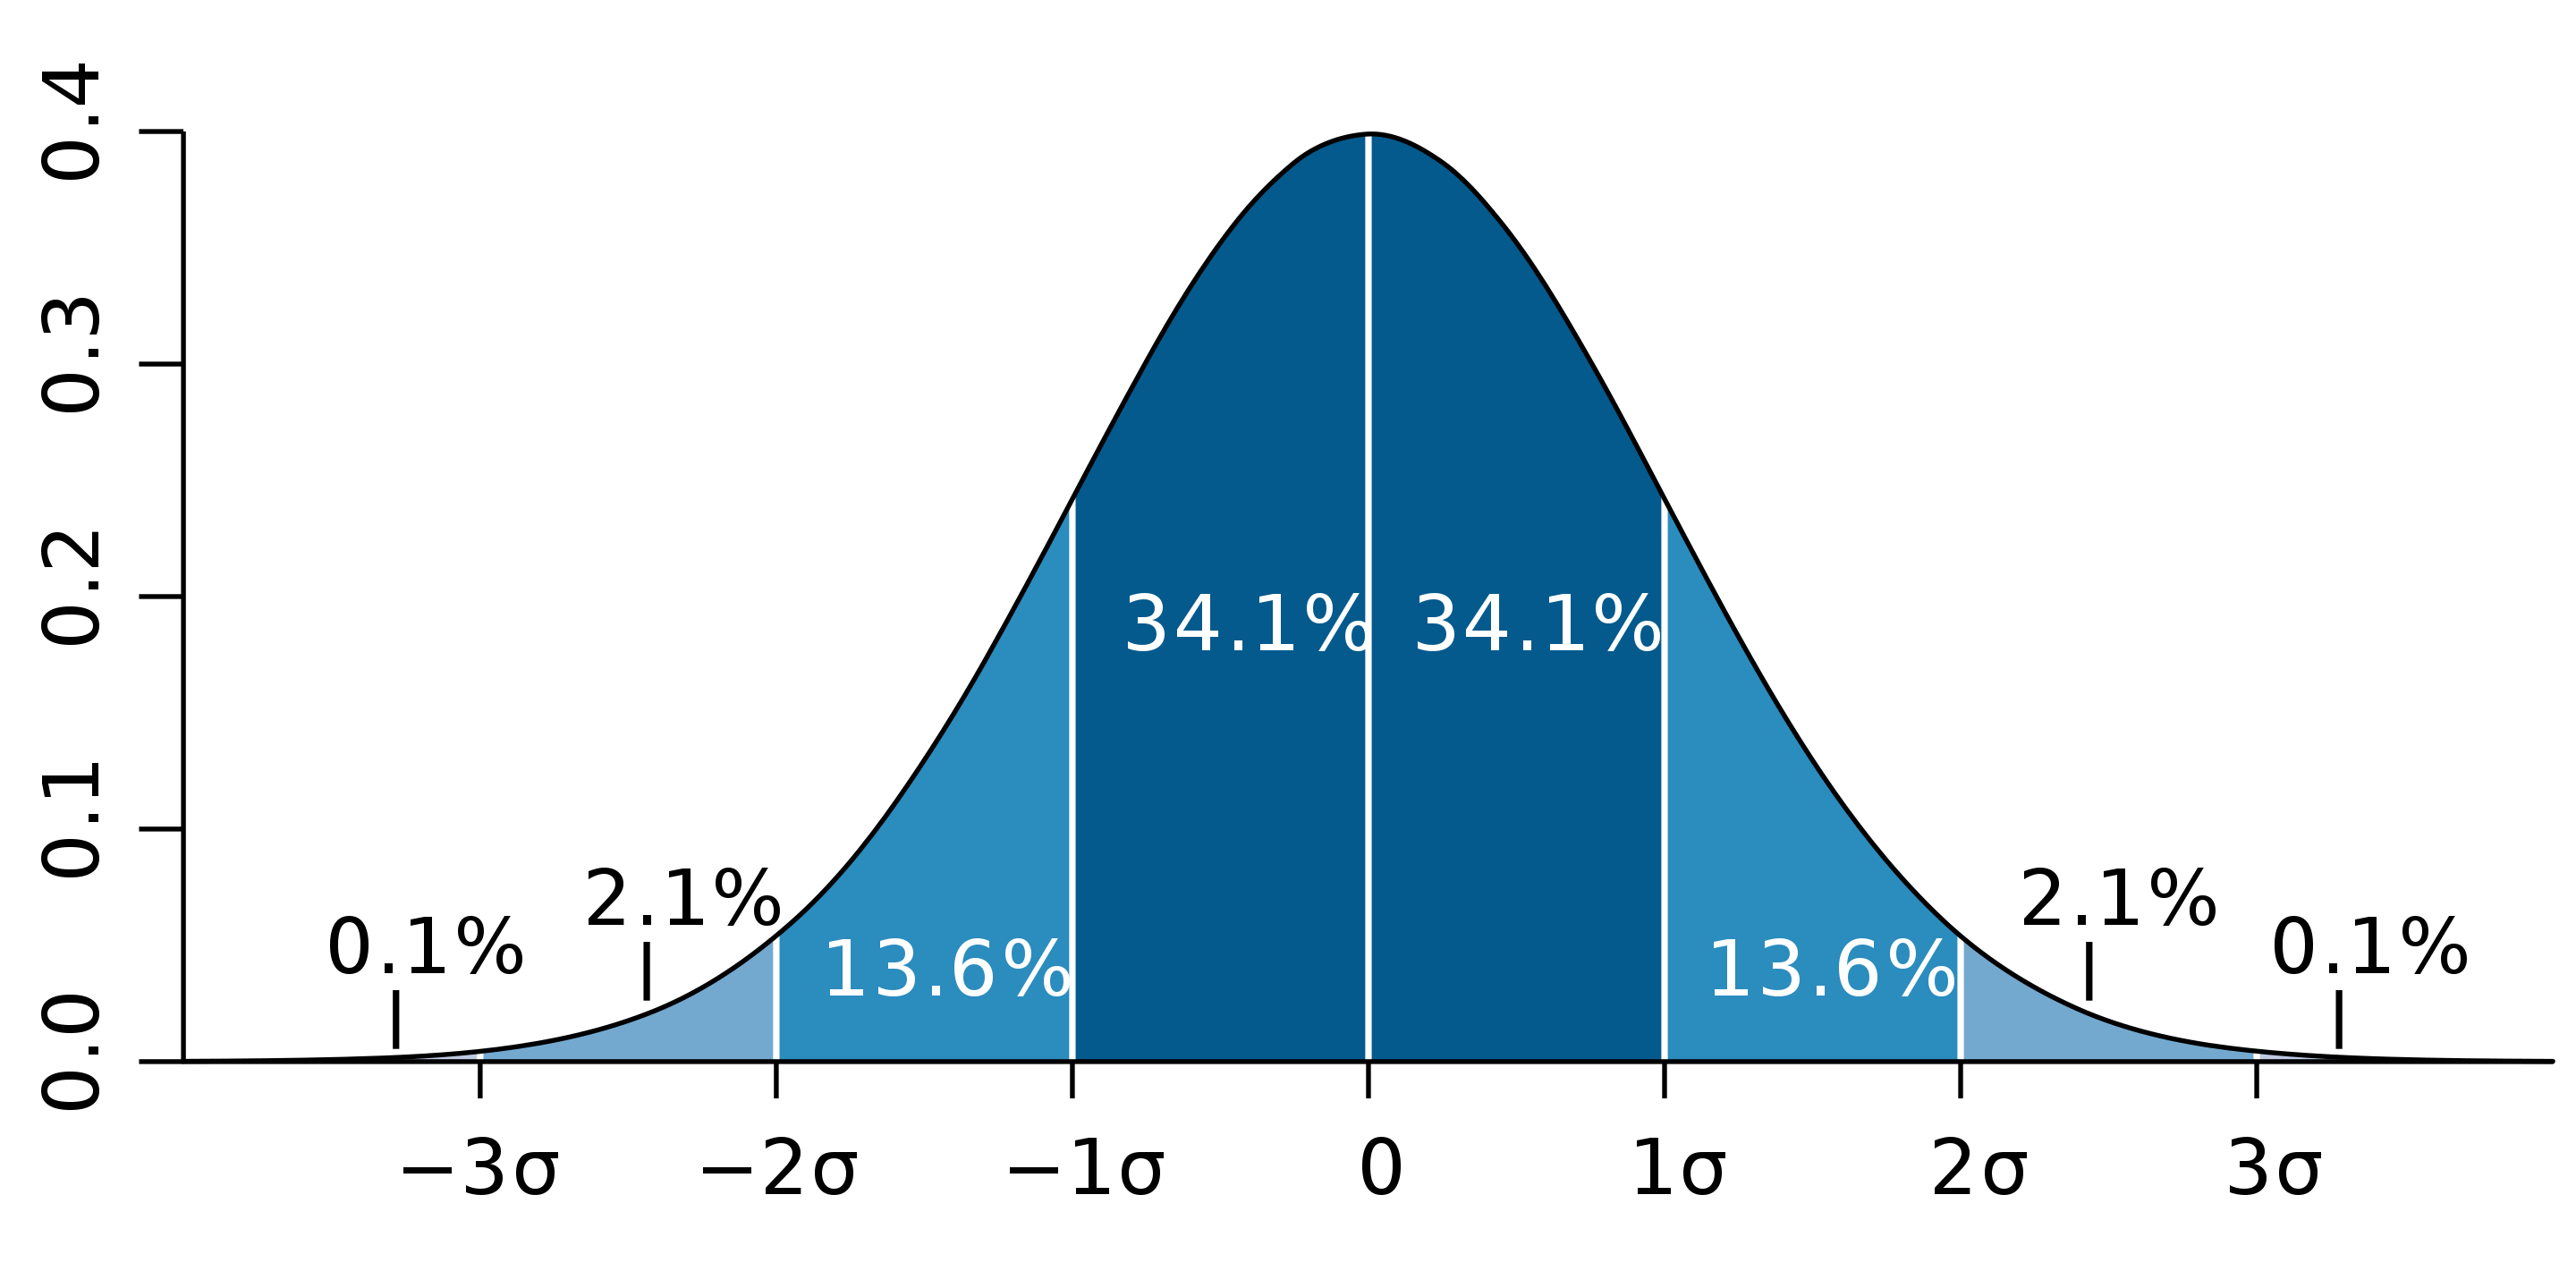

In [386]:
# 9. Load the bell curve image by concatentating it onto the base url
# and then displaying it:
Image(base_url + "images/bell-curve-standard-deviation.png", width=650)

In [411]:
# fill na horsepower w median so that we can calc percentile w/o throwing error
med_hp = cars_df["Horsepower"].median()
print('med_hp:',med_hp)
# fill the one missing hp row w the median value
cars_df["Horsepower"] = cars_df["Horsepower"].fillna(med_hp)
# now we have one less row
print(cars_df.shape) # (157,15)
cars_df.info()

med_hp: 177.5
(157, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          157 non-null    float64
 7   Width               156 non-null    float64
 8   Length              156 non-null    float64
 9   Wheelbase           156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_Performance   155 non-null    float64
dtypes: float64(11), object(4)
memory 

In [407]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Price_in_thousands  155 non-null    float64
 5   Engine_size         156 non-null    float64
 6   Horsepower          156 non-null    float64
 7   Width               156 non-null    float64
 8   Length              156 non-null    float64
 9   Wheelbase           156 non-null    float64
 10  Curb_weight         155 non-null    float64
 11  Fuel_capacity       156 non-null    float64
 12  Fuel_efficiency     154 non-null    float64
 13  Latest_Launch       157 non-null    object 
 14  Power_Performance   155 non-null    float64
dtypes: float64(11), object(4)
memory usage: 18.5+ KB


In [396]:
# 10. Find the standard deviation of the horsepower:
hp_col = cars_df["Horsepower"]
print('hp_col:',hp_col)
mean_hp = round(cars_df["Horsepower"].mean())
print("mean hp:", mean_hp) # 186
hp_std = round(np.std(hp_col),1)
print("standard deviation of horsepower col:",hp_std) # 56.5

hp_col: 0      140.0
1      225.0
2      225.0
3      210.0
4      150.0
       ...  
152    160.0
153    168.0
154    168.0
155    236.0
156    201.0
Name: Horsepower, Length: 157, dtype: float64
mean hp: 186
standard deviation of horsepower col: 56.5


- The **standard deviation** of the **Horsepower** col is around 56.5 hp
- The **mean hp** is **186**
- 68.2% of all cars have hp within 1 standard deviation of the **mean hp**.
- Therefore, 68.2% of all car hp are in the 129.5 to 232.5 range

The **variance** is the square of **standard deviation**.  
The variance unit is **Sigma: σ2** (sigma squared)

**percentile** is the percent of values in a collection of numbers that are lower than a given number.
- **np.percentile(list,pct_cut_off)**

In [392]:
# call df.describe() for stats on numeric cols
# includes min, max, mean, std, pct (75,50,25)
cars_df.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Width,Length,Wheelbase,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_Performance
count,157.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,27.390755,3.060897,185.948718,71.150000,187.343590,107.487179,3.378026,17.951923,23.844156,77.043591
std,68.029422,14.351653,1.044653,56.700321,3.451872,13.431754,7.641303,0.630502,3.887921,4.282706,25.142664
min,0.110000,9.235000,1.000000,55.000000,62.600000,149.400000,92.600000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,18.017500,2.300000,149.500000,68.400000,177.575000,103.000000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,22.799000,3.000000,177.500000,70.550000,187.900000,107.000000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,31.947500,3.575000,215.000000,73.425000,196.125000,112.200000,3.799500,19.575000,26.000000,89.414878
max,540.561000,85.500000,8.000000,450.000000,79.900000,224.500000,138.700000,5.572000,32.000000,45.000000,188.144323


In [418]:
# get the std and 75th percentile for Horsepower col,
# which should be 56.7 and 215, respectively:
hp_col = cars_df["Horsepower"]
hp_75th_pctile = np.percentile(list(hp_col),75)
print('hp_75th_pctile:',hp_75th_pctile)
print()

hp_90th_pctile = np.percentile(list(hp_col),90)
print('hp_90th_pctile:',hp_90th_pctile) # 253.8
print()

# how many hp does car need to beat 95% of all cars?
hp_95th_pctile = np.percentile(list(hp_col),95)
print('hp_95th_pctile:',hp_95th_pctile) # 300.0
print()

# how many hp does car need to beat 5% of all cars?
hp_5th_pctile = np.percentile(list(hp_col),5)
print('hp_5th_pctile:',hp_5th_pctile) # 114.6
print()

hp_75th_pctile: 215.0

hp_90th_pctile: 253.8

hp_95th_pctile: 300.0

hp_5th_pctile: 114.6



- **random.randint(min,max)** - gives one random integer in min-max range
- **random.sample(range(min,max),count)** - gives a list of unique min-max integers; list length = count

**numpy.random.uniform(min,max,N)** - returns list of N random floats in min-max range, showing uniform distribution
**numpy.random.randint(min,max_excl,N)** - returns N random ints in in min-max range; values tend to show uniform distribution; max value is exclusive

In [422]:
# 15. Make a uniform numpy array of 600 random floats between 0 and 6
# the idea here is to emulate 600 rolling of the dice--we should get appox
# 100 values in each of the 6 bins: 0-1, 1-2, 2-3, etc.
rand_uniform_600 = np.random.uniform(0,6,600)
print('rand_uniform_600[:60]:\n',rand_uniform_600[:60])

rand_uniform_600[:60]:
 [5.83749799 2.06840152 0.12500653 4.86525969 2.60344418 1.97140595
 0.09138699 1.13063559 2.30210267 5.9832089  5.8566266  1.8329126
 4.14404317 5.93282837 3.38582923 2.28347596 4.94420896 1.75959614
 5.81819949 4.51158924 4.60108344 0.56727098 1.04754689 5.93453832
 5.03900295 2.81433632 4.7869627  1.38813775 1.27806671 3.19572046
 2.72222839 5.85053169 5.91047256 1.98601776 0.59215444 0.27600529
 3.9886786  0.26542567 2.14976704 1.71957847 3.69587474 3.55348708
 0.67451617 1.71060671 3.46983404 2.69043042 5.62354891 5.95520435
 5.6184388  2.0450764  1.71587025 1.29646906 1.09213428 5.28279942
 3.39573152 3.89233746 0.51306388 3.5771188  2.6117491  1.24772659]


**histogram** shows **frequency distribution** -- how many items fall within specified ranges.  

Each range, called a **bin**, is visualized as a column.

**uniform distribution** is when all values are more or less uniformly distributed, as by random.  
The greater the sample size, the more even the distribution.
**plt.hist(x,bins)**

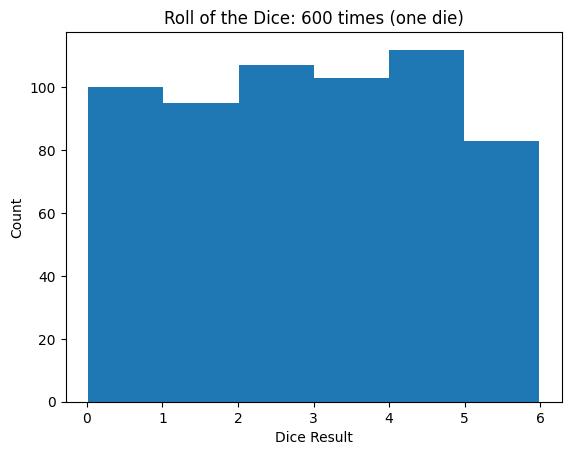

In [421]:
# 16. Make a histogram of the rand_floats. Since the values
#.    were generatead by random.uniform, there should be
#.    100 items, give or take, in each of 6 bins. However,
#.    due to the very small sample size, the bins will have
#.    very different heights:
plt.hist(x=rand_uniform_600,bins=6)
plt.title('Roll of the Dice: 600 times (one die)')
plt.xlabel('Dice Result')
plt.ylabel('Count')
plt.show()

In [425]:
# similar to above with the 600 random floats,
# but this is 600 random ints from 1,6 at
# then just bar chart
rand_600_ints = np.random.randint(1,7,600)
print(rand_600_ints[:60])

[5 2 4 1 3 2 4 1 4 5 4 5 2 4 6 1 4 6 3 4 3 1 3 4 3 2 2 6 5 2 2 5 6 6 4 3 2
 5 1 4 4 2 4 1 3 3 3 5 1 1 6 4 2 5 3 5 2 4 3 2]


#### **unique_values, value_counts = np.unique(list, return_counts=True)**
- returns TWO values, which you save to variables:
```python
  unique_values, value_counts = np.unique(list, return_counts=True)
  print('unique_values:', unique_values) # [1 2 3 4 5 6]
  print('value_counts:', value_counts) # [102 94 103 102 101 98]
```

unique_values: [1 2 3 4 5 6]
value_counts: [113  96 101  98 104  88]


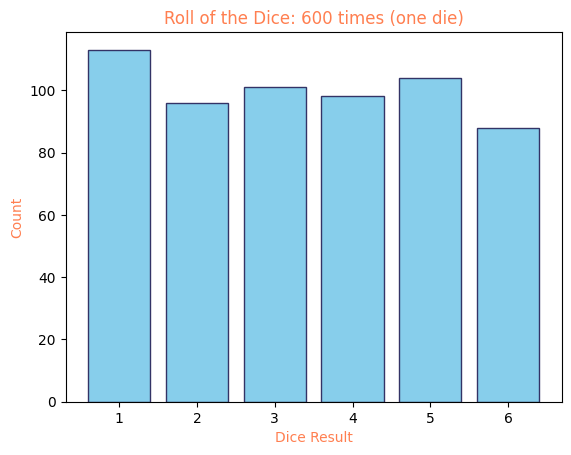

In [435]:
# plot the rolls of the dice as bars.. don't need histogram bins cuz these values are not ranges
# Count occurrences of each face
unique_values, value_counts = np.unique(rand_600_ints, return_counts=True)
print('unique_values:', unique_values) # [1 2 3 4 5 6]
print('value_counts:', value_counts) # [102 94 103 102 101 98]

# Plot bar chart
plt.bar(x=unique_values, height=value_counts,
        color='skyblue', edgecolor='#336')

plt.title('Roll of the Dice: 600 times (one die)', color='coral')
plt.xlabel('Dice Result', color='coral')
plt.ylabel('Count', color='coral')

# increase ylim to make room for bar number value labels


# add the values to each bar
# add vertical space to show the bar values
# use enumerate() to gain access to the index of each bar as you loop

# print('value_counts[n]:',value_counts[n])
# output text count label for each bar in x,y space

plt.show()

In [439]:
# 17. Repeat the previous two steps, but this time with 6,000 items:
rand_6k_ints = np.random.randint(1,7,6000)
print(rand_6k_ints[5900:]) # the last 100

[6 5 4 3 5 3 5 3 4 3 2 1 3 3 2 3 5 6 1 4 4 2 5 2 2 2 4 4 5 5 4 1 2 5 2 1 6
 5 2 4 3 2 6 6 4 2 4 4 1 5 6 2 3 3 2 6 3 4 1 2 6 1 6 4 5 2 5 3 5 3 1 5 2 3
 6 4 5 2 2 6 6 5 4 1 5 3 6 4 6 4 5 6 5 2 1 1 2 1 6 6]


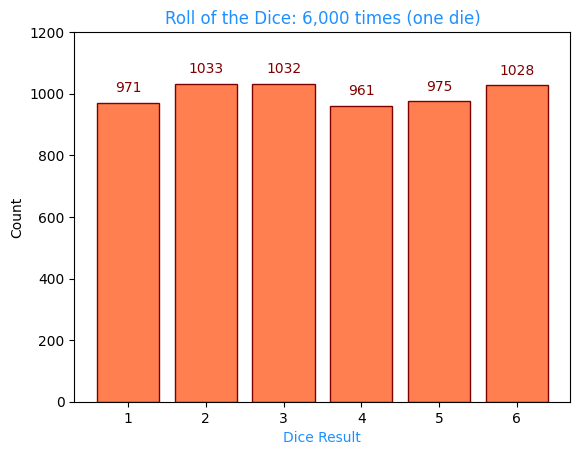

In [466]:
# get the unique values and values counts of the 6K items
unique_values, value_counts = np.unique(rand_6k_ints, return_counts=True)

# print('unique_values:',unique_values) # [1 2 3 4 5 6]
# print('value_counts:',value_counts) # [985  980 1004 1007 1018 1004]

# Plot bar chart
plt.bar(x=unique_values,height=value_counts, color='coral',edgecolor='maroon')

plt.title('Roll of the Dice: 6,000 times (one die)',color='dodgerblue')
plt.xlabel('Dice Result',color='dodgerblue')
plt.ylabel('Count')

# add space above each bar to make room for numeric labels
plt.ylim(0,1200)

# add the values to each bar
# add vertical space to show the bar values
# use enumerate() to gain access to the index of each bar as you loop
# output text count label for each bar in x,y space
for n in range(6):
  plt.text(n+1, value_counts[n]+35, str(value_counts[n]),
           ha='center', color='maroon')

# output a test message to the chart:
# plt.text(3, 1075, 'hola', ha='center')
plt.show()

- **normal distribution** is when values tend to cluster around the mean, as in a **bell curve**.
- **numpy.random.normal(mean, standard_deviation, number_of_values)**

first 100 test scores:
 [103.36276562  92.93115753  96.97254177 106.21526396 124.82996422
  87.30908935 129.05272087  85.6908224  131.63937181 105.19311299
 103.97057035  84.73085585  72.50807435 104.00669321 104.33634798
 113.40209708  85.03666056  92.4427294  110.76187379  90.18783739
  79.48292543 119.13642107 100.04546082  92.34750839 112.89710089
  67.73858415  69.76597926  81.30900385 116.65956593 100.17106167]


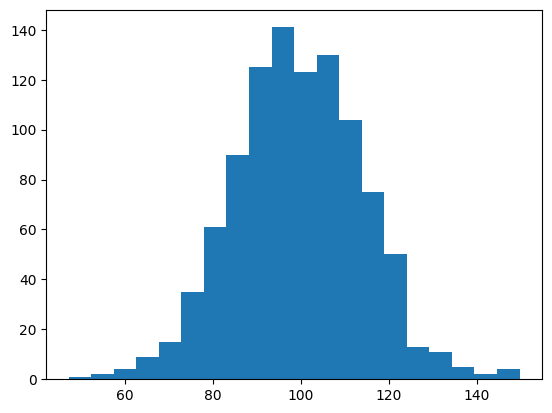

In [473]:
# 18. Make a normal distribution of 1,000 test scores that have an average value
#.    of 100 and a standard deviation of 15 (that is, 68.2% of values will be
#.    with in the 85-115 range). Plot the result as a histogram of 20 bins
_1000_test_scores = np.random.normal(100,15,1000)
print('first 100 test scores:\n', _1000_test_scores[:30])
# the result is a jaggy bell curve -- not enough bins and too small a sample
plt.hist(x=_1000_test_scores, bins=20)

plt.show()

In [476]:
# 19. Plot a 250,000 with the same mean (100) and standard deviation (15).
#.    Increase bins to 200. The resulting bell curve will be much smoother:
# "Test Score Bell Curve Normal Distribution"
_250k_test_scores = np.random.normal(100,15,250_000)
print('min test score:', round(min(_250k_test_scores)))
print('max test score:',  round(max(_250k_test_scores)))
print('82% pct score:', round(np.percentile(_250k_test_scores,82)))
print('98% pct score:', round(np.percentile(_250k_test_scores,98)))
print('99% pct score:', round(np.percentile(_250k_test_scores,99)))
print('99.9% pct:', round(np.percentile(_250k_test_scores,99.9))) # 1 in 1K
print('99.99% pct:', round(np.percentile(_250k_test_scores,99.99))) # 1 in 10K

min test score: 33
max test score: 169
82% pct score: 114
98% pct score: 131
99% pct score: 135
99.9% pct: 146
99.99% pct: 157


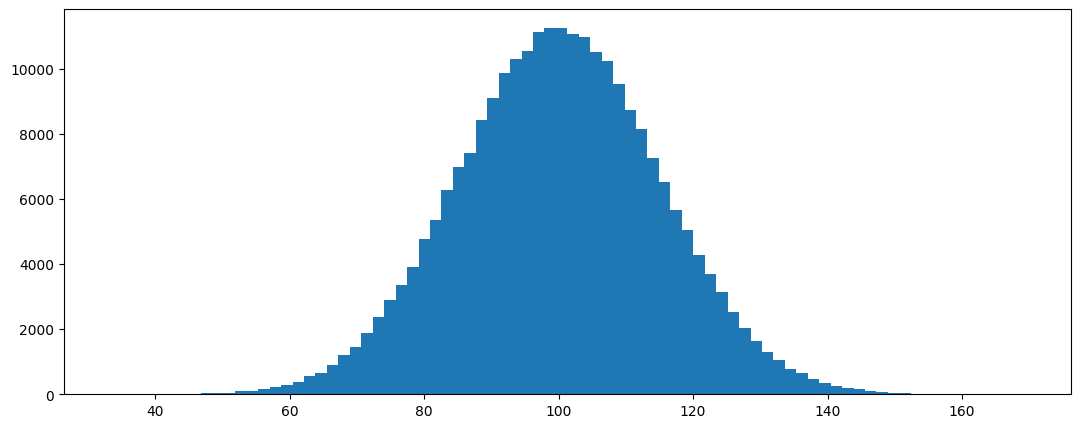

In [491]:
# make the bell curve for the 250K test scores
plt.figure(figsize=(13, 5))
plt.hist(x=_250k_test_scores,bins=80)
plt.show()

**regression** is used to *predict* the relationship between variables:  
in terms of **(x,y)** points: given just **x**, we may be able to predict **y** --  *if* we have some existing **(x,y)** points to study first.

**linear Regression** uses the relationship between known data-points to draw a straight line through all them.
- the **regression line**, also called the **best fit** line, minimizes the distance from the line to *all* points
- more specifically, the best fit line minimizes the **sum of the squares** of all the distances from the dots to the line, and is also called the **least squares line**

This line can be used to predict future values.

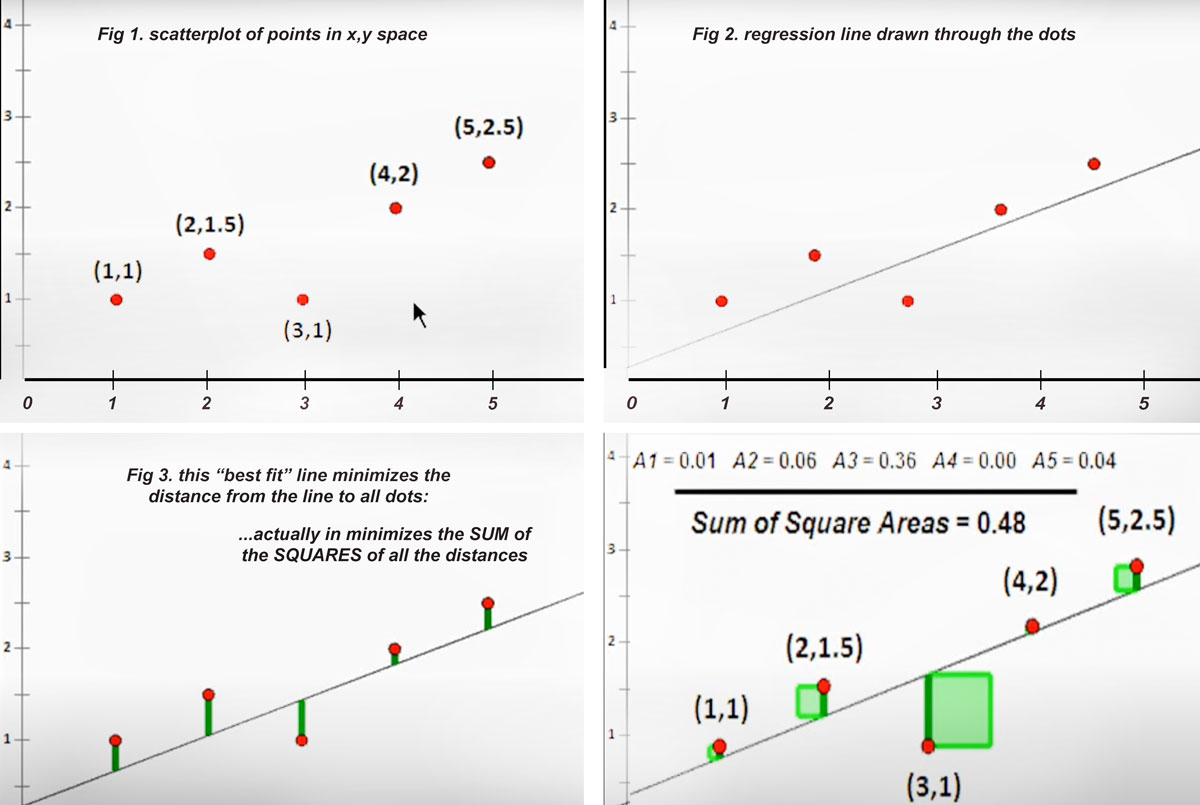

In [496]:
# 22. output the regression best fit line image:
# a 4-pack showing what the regression line is and and how it is drawn:
Image(base_url + "images/regression-best-fit-line.jpg", width=900)

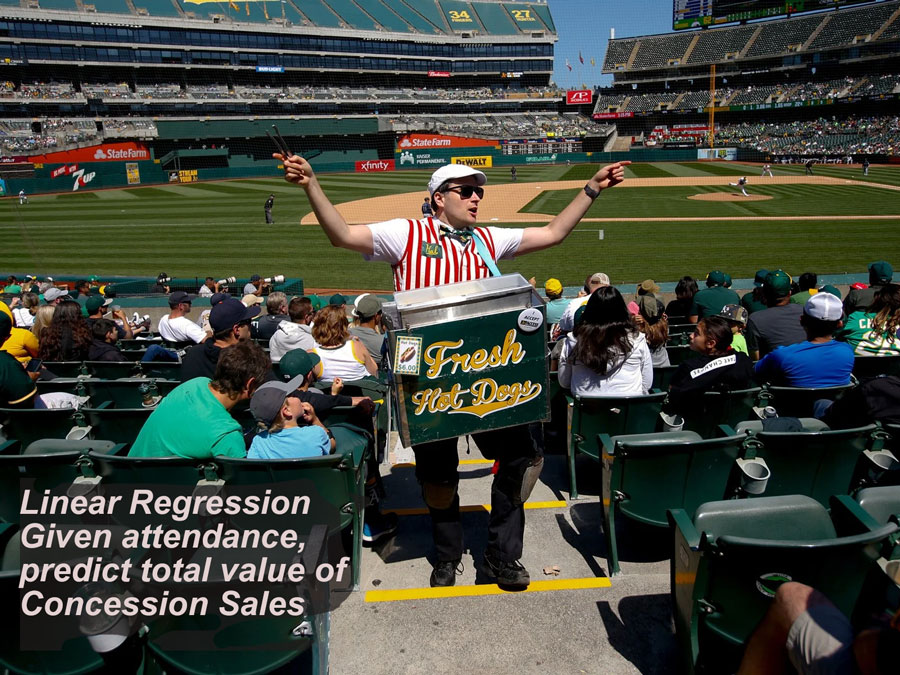

In [497]:
Image(base_url + 'images/attendance-vs-concessions.jpg',width=700)

In [498]:
# 23. Make some x-y values of ballgame attendance and concession stand revenue
# in general, the greater the attendance, the greater the revenue, BUT
# how can we predict revenue given only an attendance number

attendance = [25678,22455,17796,18098,27029,22342,19453,32089,29089,31024,15190,32454,24033,26343]

# make sure the two lists have the same number of values -- a scatterplot requirement:

concessions = [750202,632144,593234,502243,730343,753433,534934,800242,779908,848403,430989,874977,629385,743086]

print(len(attendance))
print(len(concessions))

14
14


In [499]:
# challenge: make a 2-col dataframe using the 2 lists w column headers
ballpark_df = pd.DataFrame()

In [500]:
ballpark_df["Attendance"] = attendance
ballpark_df["Concessions"] = concessions

In [502]:
print(ballpark_df.shape) # (14, 2)
ballpark_df.head()

(14, 2)


,Attendance,Concessions
0,25678,750202
1,22455,632144
2,17796,593234
3,18098,502243
4,27029,730343


- **vector operations** doing math between corresponding items in 2+ cols

In [503]:
# add a col for "Avg Per Person Sales" which you may
# abbreviate as "Avg PP Sales"
# "Concessions" "Attendance"
# (round to 2 decimals)
ballpark_df["Avg PP Sales"] = round(ballpark_df["Concessions"] / ballpark_df["Attendance"],2)

In [508]:
print(ballpark_df.shape) # (14, 3)
ballpark_df.head(2)

(14, 3)


,Attendance,Concessions,PP Sales
0,25678,750202,29.22
1,22455,632144,28.15


In [509]:
# rename "Avg PP Sales" and just "PP Sales"
ballpark_df.rename(columns={"Avg PP Sales":"PP Sales"},inplace=True)
print(ballpark_df.shape) # (14, 3)
ballpark_df.head(2)

(14, 3)


,Attendance,Concessions,PP Sales
0,25678,750202,29.22
1,22455,632144,28.15


**y = mx + b** is the formula for the slope of a line.
- if you have any 3 of the four values, you can solve for the missing one
- **y** is concessions revenue, which is what we want to predict for a given attendance (x value)
- so, we use the linregress method to get the slope and y-intercept,  
plug those into the formula along with x, and in that way solve for y

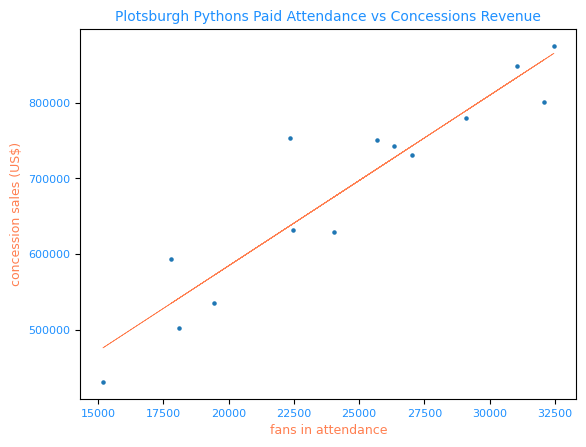

In [523]:
# 24. plot attendance vs concessions as a scatterplot
#     and on top of that, add the regression line
x = ballpark_df["Attendance"]
y = ballpark_df["Concessions"]

# scatter the 14 (x,y) dots:
plt.scatter(x,y,s=5)
plt.title("Plotsburgh Pythons Paid Attendance vs Concessions Revenue",fontsize=10,color='dodgerblue')
plt.xlabel('fans in attendance',fontsize=9,color='coral')
plt.xticks(fontsize=8,color='dodgerblue')
plt.ylabel('concession sales (US$)',fontsize=9,color='coral')
plt.yticks(fontsize=8,color='dodgerblue')

# we get a strong positive correlation between attendance and concessions revenue,
# as expected; next we'll draw a regression line through the dots
# m # m, b used for finding x or y
# in terms of the other via the famous equation y = mx + b
m, b = np.polyfit(x,y,1)
# drawing regression line requires numpy arrays for x values -- plain list won't work
plt.plot(x,m*x+b,color='coral',lw=0.5)
plt.show()

In [532]:
# predict concessions for 21000, 25000 (and other attendance) figures
# ${big_number:,.2f} converts to comma format, and optionally prepends $
num_fans = int(input("Enter number of fans, get predicted concessions sales: "))
if(num_fans < 15000):
  print("Please enter a value between 15000 and 35000")
else:
  sales_rev = round(m * num_fans + b)

print(f'Number of fans: {num_fans:,.0f}\nConcession sales: ${sales_rev:,.0f}')

Enter number of fans, get predicted concessions sales: 40000
Number of fans: 40,000
Concession sales: $1,035,238
